In [4]:
#import all needed libraries and perform required configuration setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import csv
import tldextract
import socket 
#from tqdm._tqdm_notebook import tqdm_notebook
from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas(desc="progress-bar", leave=False)
#tqdm.pandas(desc="progress-bar")
import seaborn as sns
import s3fs
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style='darkgrid',palette='Dark2',rc={'figure.figsize':(9,6),'figure.dpi':100})


## Read datasets

In [5]:
test = pd.read_csv('s3://osanusi-auto/cleaned_frl_fake2.csv')
test.head(5)

,Unnamed: 0,domain,type,content,scraped_at,title,label
0,7766484,nytimes.com,reliable,One month after a three-judge panel of a feder...,2018-02-11 00:42:14.935145+00:00,Appeal of Challenge to ‘No Child’ Law,real
1,6845267,www.yahoo.com,reliable,STOCKHOLM (Reuters) - Sweden will seek assuran...,2016-11-11 14:16:53.754000+00:00,Sweden seek assurances from Trump regarding de...,real
2,8102733,nytimes.com,reliable,"But this week, the bus’s practices gained wide...",2018-02-11 00:45:31.225957+00:00,"At Front of Brooklyn Bus, a Clash of Religious...",real
3,6917956,www.yahoo.com,reliable,BEIRUT (AP) — The Latest on developments in Sy...,2016-11-08 03:28:07.118000+00:00,The Latest: Turkey: Use of Kurds against IS 'n...,real
4,6965379,www.sfgate.com,reliable,Hot-shooting Tennessee Tech routs Alabama A&M ...,2016-11-18 22:38:10.550000+00:00,Hot-shooting Tennessee Tech routs Alabama A&M ...,real


## Obtain domain IP address

In [6]:
# Importing socket library 
import socket 

In [7]:
def get_domain_IP(text): 
    try: 
        #host_name = socket.gethostname(text) 
        #host = socket.gethostbyaddr(addr)
        #hostname = host[0]
        host_ip = socket.gethostbyname(text) 
        #print("Hostname : ",host_name) 
        return host_ip 
    except: 
        return "unknown" 


In [8]:
test['domain_ip'] = test['domain'].progress_apply(get_domain_IP)
test

,Unnamed: 0,domain,type,content,scraped_at,title,label,domain_ip
0,7766484,nytimes.com,reliable,One month after a three-judge panel of a feder...,2018-02-11 00:42:14.935145+00:00,Appeal of Challenge to ‘No Child’ Law,real,151.101.129.164
1,6845267,www.yahoo.com,reliable,STOCKHOLM (Reuters) - Sweden will seek assuran...,2016-11-11 14:16:53.754000+00:00,Sweden seek assurances from Trump regarding de...,real,74.6.231.20
2,8102733,nytimes.com,reliable,"But this week, the bus’s practices gained wide...",2018-02-11 00:45:31.225957+00:00,"At Front of Brooklyn Bus, a Clash of Religious...",real,151.101.129.164
3,6917956,www.yahoo.com,reliable,BEIRUT (AP) — The Latest on developments in Sy...,2016-11-08 03:28:07.118000+00:00,The Latest: Turkey: Use of Kurds against IS 'n...,real,74.6.231.20
4,6965379,www.sfgate.com,reliable,Hot-shooting Tennessee Tech routs Alabama A&M ...,2016-11-18 22:38:10.550000+00:00,Hot-shooting Tennessee Tech routs Alabama A&M ...,real,151.101.248.200
...,...,...,...,...,...,...,...,...
1787995,2479097,dailyheadlines.net,fake,"At DailyHeadlines.net, the privacy of our visi...",2017-11-18 20:01:27.400599+00:00,Privacy Policy,fake,104.18.53.134
1787996,3466830,coed.com,fake,Catherine Deneuve turns 70 years old today–but...,2017-11-27 01:14:21.395055+00:00,Catherine Deneuve: 63 Sexy Photos for Her 70th...,fake,104.21.235.160
1787997,4848793,beforeitsnews.com,fake,How Well Can You See\n\n(Before It's News)\n\n...,2017-11-27 01:14:08.745400+00:00,How Well Can You See,fake,104.22.75.138
1787998,3376221,ushealthyadvisor.com,fake,President Trump reported on Wednesday that the...,2017-11-27 01:15:37.733539+00:00,military Archives,fake,204.11.56.48


## Extract unique domain name from url

In [9]:
import tldextract
def extract_domain(url):
    """
    Extract domain name from fld url
    """
    info = tldextract.extract(url)
    return info.domain

In [10]:
test['domain'] = test['domain'].progress_apply(extract_domain)
test.head(10)

,Unnamed: 0,domain,type,content,scraped_at,title,label,domain_ip
0,7766484,nytimes,reliable,One month after a three-judge panel of a feder...,2018-02-11 00:42:14.935145+00:00,Appeal of Challenge to ‘No Child’ Law,real,151.101.129.164
1,6845267,yahoo,reliable,STOCKHOLM (Reuters) - Sweden will seek assuran...,2016-11-11 14:16:53.754000+00:00,Sweden seek assurances from Trump regarding de...,real,74.6.231.20
2,8102733,nytimes,reliable,"But this week, the bus’s practices gained wide...",2018-02-11 00:45:31.225957+00:00,"At Front of Brooklyn Bus, a Clash of Religious...",real,151.101.129.164
3,6917956,yahoo,reliable,BEIRUT (AP) — The Latest on developments in Sy...,2016-11-08 03:28:07.118000+00:00,The Latest: Turkey: Use of Kurds against IS 'n...,real,74.6.231.20
4,6965379,sfgate,reliable,Hot-shooting Tennessee Tech routs Alabama A&M ...,2016-11-18 22:38:10.550000+00:00,Hot-shooting Tennessee Tech routs Alabama A&M ...,real,151.101.248.200
5,7989942,nytimes,reliable,"WADING THROUGH FLOWERS IN LISSE, THE NETHERLAN...",2018-02-11 00:44:27.176480+00:00,WHY WE TRAVEL,real,151.101.129.164
6,7051291,nytimes,reliable,Fatigue a Labor Issue\n\nLabor unions and legi...,2018-02-11 00:35:22.958955+00:00,INSIDE,real,151.101.129.164
7,7170560,nytimes,reliable,"José Fajardo, a Cuban flutist who was one of t...",2018-02-11 00:36:25.417832+00:00,"José Fajardo, 82, Flutist And Bandleader, Is Dead",real,151.101.129.164
8,6857018,businessinsider,reliable,print \nDemocratic presidential candidate Hill...,2016-11-06 19:44:20.154000+00:00,"Georgia senators break with party, say they'll...",real,151.101.201.171
9,8113576,nytimes,reliable,ONE of my patients called me with a high fever...,2018-02-11 00:45:40.180827+00:00,Bring Health Care Home,real,151.101.129.164


## Unique counts of domain

In [11]:
test['domain'].value_counts(dropna=False, ascending=False)

beforeitsnews           780368
nytimes                 723138
yahoo                    34776
reuters                  27109
threepercenternation     24344
                         ...  
libertyalliance              1
bighairynews                 1
interestingdailynews         1
ushealthylife                1
thetruthseeker               1
Name: domain, Length: 156, dtype: int64

<AxesSubplot:title={'center':'Distribution of the number of articles from first 25 domains'}>

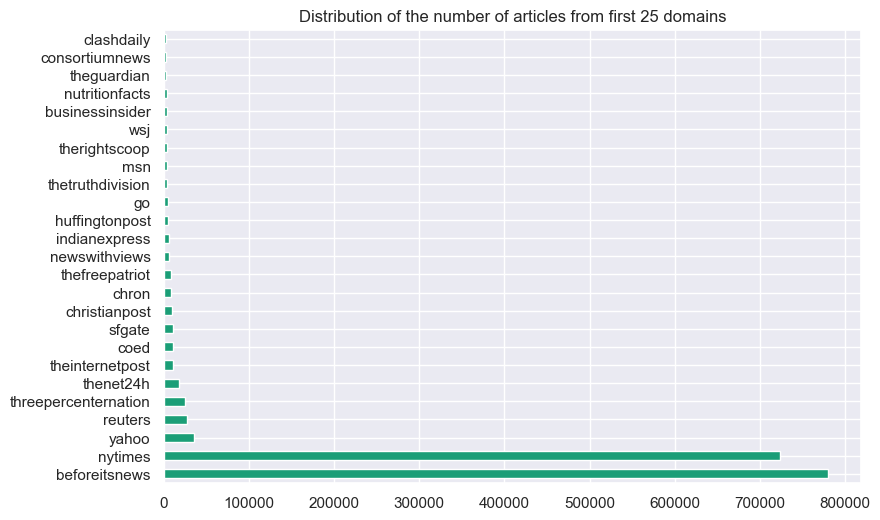

In [12]:
test.domain.value_counts(ascending=False).head(25).plot.barh(title='Distribution of the number of articles from first 25 domains')

## Unique counts of domain ip address

In [13]:
test['domain_ip'].value_counts(dropna=False, ascending=False)

151.101.193.164    309330
104.22.74.138      277003
104.22.75.138      275546
172.67.14.110      227819
151.101.1.164      227075
                    ...  
104.24.97.2             1
172.67.178.43           1
172.67.223.154          1
69.162.80.51            1
216.15.207.174          1
Name: domain_ip, Length: 330, dtype: int64

<AxesSubplot:title={'center':'Distribution of the number of articles from first 25 domain ip address'}>

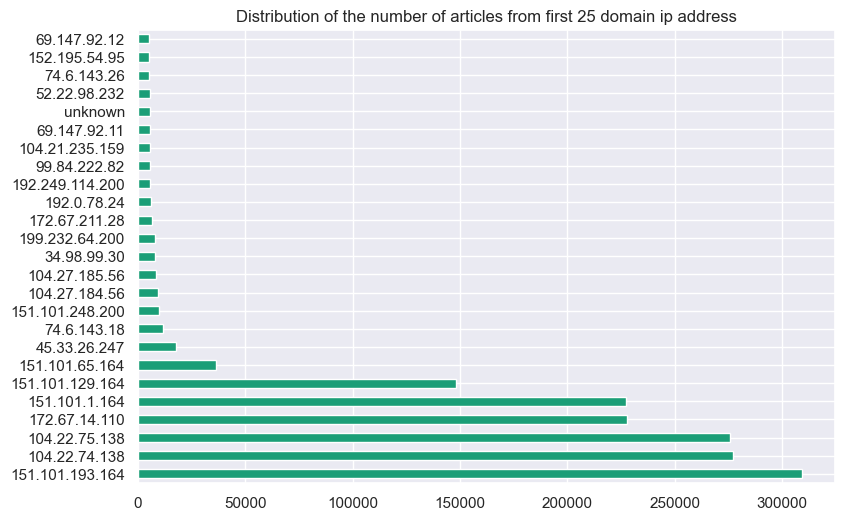

In [14]:
test['domain_ip'].value_counts(ascending=False).head(25).plot.barh(title='Distribution of the number of articles from first 25 domain ip address')

In [15]:
test[test['domain_ip']=='unknown']

,Unnamed: 0,domain,type,content,scraped_at,title,label,domain_ip
387,6945864,bloomberg,reliable,Asian Stocks Drop as Fed Hike Nears; Nikkei 22...,2016-11-18 14:52:22.152000+00:00,Asian Stocks Drop as Fed Hike Nears; Nikkei 22...,real,unknown
745,6658674,bloomberg,reliable,China Flips Roles With U.S. in Trump Era With ...,2016-11-21 03:23:33.702000+00:00,China Flips Roles With U.S. in Trump Era With ...,real,unknown
2711,6969670,reuters,reliable,"Stratus, a product launch and marketing agency...",2016-11-18 05:20:41.408000+00:00,Toyota says testing Mirai fuel-cell vehicle in...,real,unknown
3969,6700489,reuters,reliable,0 Comments U.S. crude stockpiles fall as impor...,2016-11-23 17:53:08.160000+00:00,"U.S. crude stockpiles fall as imports drop, re...",real,unknown
4150,6786789,reuters,reliable,Nov 3 Aclaris Therapeutics Inc :\n* Files for ...,2016-11-02 22:41:06.493000+00:00,BRIEF-Aclaris Therapeutics files for mixed she...,real,unknown
...,...,...,...,...,...,...,...,...
1786772,5138171,thetruthdivision,fake,BREAKING: Federal Watchdog Makes Hillary’s Wor...,2017-11-27 01:15:32.269834+00:00,Anthony Weiner Archives,fake,unknown
1786999,5141341,thetruthdivision,fake,"Earlier this week, ISIS suffered a major defea...",2017-11-27 01:15:32.269834+00:00,Saudi King Issues Incredible Message To Trump ...,fake,unknown
1787277,5167316,thetruthdivision,fake,"WOW: 24 Hours After Cancer Diagnosis, McCain I...",2017-11-27 01:15:32.269834+00:00,"The Truth Division, Author at The Truth Division",fake,unknown
1787441,5176149,thetruthdivision,fake,The leakers are beginning to be purged — and t...,2017-11-27 01:15:32.269834+00:00,BUSTED: Anderson Cooper Has Ties To Arrested N...,fake,unknown


## Distribution of the type column

In [17]:
test.type.value_counts(dropna=False, ascending=False)

fake        894000
reliable    894000
Name: type, dtype: int64

<AxesSubplot:>

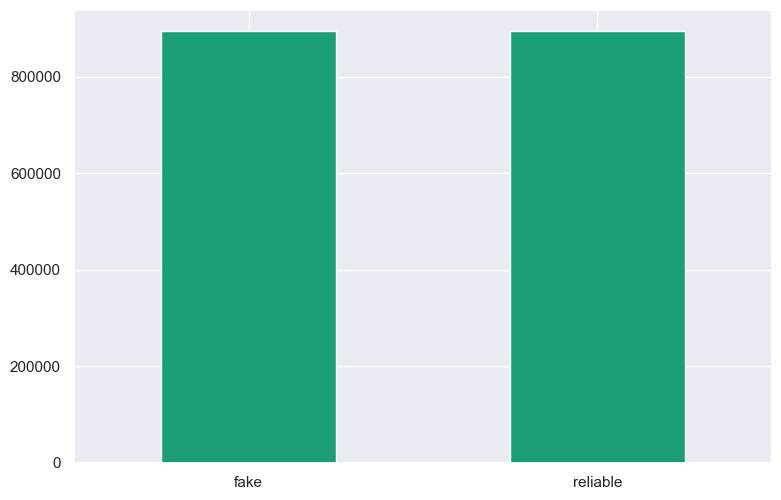

In [18]:
test.type.value_counts(dropna=False, ascending=False).plot.bar(rot=0)